In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-dataset/train-images.idx3-ubyte
/kaggle/input/mnist-dataset/t10k-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images.idx3-ubyte
/kaggle/input/mnist-dataset/train-labels.idx1-ubyte
/kaggle/input/mnist-dataset/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/mnist-dataset/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/mnist-dataset/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/mnist-dataset/train-images-idx3-ubyte/train-images-idx3-ubyte


# **Sample code for classification problems** #

**Dataset used:**
  MNIST from sklearn

**Machine learning algorithms used:**

k-nearest neighbor (KNN), artificial neural network (ANN)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats

# **Load MNIST dataset**#

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The MNIST database has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.



In [3]:
d = datasets.load_digits()
X = d.data
y = d.target

In [4]:
d

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

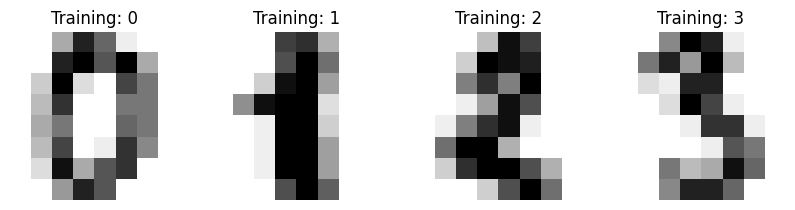

In [5]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, d.images, d.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
plt.show()

# **Baseline Machine Learning Models: Classifiers with Default Hyperparameters**

**Using 3-Fold Cross-Validation**

In [6]:
#Random Forest
clf = RandomForestClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9365609348914857


In [7]:
#SVM
clf = SVC()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9699499165275459


In [8]:
#KNN
clf = KNeighborsClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9627156371730662


In [9]:
#ANN
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
def ANN(optimizer = 'sgd',neurons=32,batch_size=32,epochs=20,activation='relu',patience=3,loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(10,activation='softmax'))  # 10 is the number of classes in the dataset, you can change it based on your dataset
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)# early stop patience
    history = model.fit(X, pd.get_dummies(y).values,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

In [10]:
clf = KerasClassifier(build_fn=ANN, verbose=0)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

/tmp/ipykernel_20/2162434965.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN, verbose=0)


19/19 [==============================] - 0s 1ms/step
Accuracy:0.989983305509182


# HPO Algorithm 1: Grid Search

Search all the given hyper-parameter configurations

**Advantages**:

* Simple implementation.

**Disadvantages**:

* Time-consuming,
* Only efficient with categorical HPs.

In [11]:
#Random Forest
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 30}
Accuracy:0.9360044518642182


In [12]:
#SVM
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'C': 10, 'kernel': 'rbf'}
Accuracy:0.9738452977184195


In [13]:
#KNN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20],
}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'n_neighbors': 3}
Accuracy:0.9682804674457429


In [14]:
"""
#ANN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop','sgd'],
    'activation': ['relu','tanh'],
    'batch_size': [16,32],
    'neurons':[16,32],
    'epochs':[20,50],
    'patience':[2,5]
}
clf = KerasClassifier(build_fn=ANN, verbose=0)
grid = GridSearchCV(clf, rf_params, cv=3,scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))
"""
#resuls as {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'neurons': 32, 'optimizer': 'adam', 'patience': 5}
#Accuracy:0.9994435169727324

'\n#ANN\nfrom sklearn.model_selection import GridSearchCV\nrf_params = {\n    \'optimizer\': [\'adam\',\'rmsprop\',\'sgd\'],\n    \'activation\': [\'relu\',\'tanh\'],\n    \'batch_size\': [16,32],\n    \'neurons\':[16,32],\n    \'epochs\':[20,50],\n    \'patience\':[2,5]\n}\nclf = KerasClassifier(build_fn=ANN, verbose=0)\ngrid = GridSearchCV(clf, rf_params, cv=3,scoring=\'accuracy\')\ngrid.fit(X, y)\nprint(grid.best_params_)\nprint("Accuracy:"+ str(grid.best_score_))\n'

# HPO Algorithm 2: Random Search

Randomly search hyper-parameter combinations in the search space

**Advantages**:

* More efficient than GS.
* Enable parallelization.

**Disadvantages**:

* Not consider previous results.
* Not efficient with conditional HPs.

In [15]:
#Random Forest
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': sp_randint(10,100),
    "max_features":sp_randint(1,64),
    'max_depth': sp_randint(5,50),
    "min_samples_split":sp_randint(2,11),
    "min_samples_leaf":sp_randint(1,11),
    "criterion":['gini','entropy']
}
n_iter_search=20 #number of iterations is set to 20, you can increase this number if time permits
clf = RandomForestClassifier(random_state=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'criterion': 'gini', 'max_depth': 43, 'max_features': 25, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 89}
Accuracy:0.9287701725097385


In [16]:
#SVM
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'C': stats.uniform(0,50),
    "kernel":['linear','poly','rbf','sigmoid']
}
n_iter_search=20
clf = SVC(gamma='scale')
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))

{'C': 28.516397910409246, 'kernel': 'rbf'}
Accuracy:0.9738452977184195


In [17]:
#KNN
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'n_neighbors': range(1,20),
}
n_iter_search=10
clf = KNeighborsClassifier()
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))


{'n_neighbors': 3}
Accuracy:0.9682804674457429


In [18]:
"""
#ANN
from scipy.stats import randint as sp_randint
from random import randrange as sp_randrange
from sklearn.model_selection import RandomizedSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop','sgd'],
    'activation': ['relu','tanh'],
    'batch_size': [16,32,64],
    'neurons':sp_randint(10,100),
    'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':sp_randint(3,20)
}
n_iter_search=10
clf = KerasClassifier(build_fn=ANN, verbose=0)
Random = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring='accuracy')
Random.fit(X, y)
print(Random.best_params_)
print("Accuracy:"+ str(Random.best_score_))
"""
#results as {'activation': 'relu', 'epochs': 20, 'optimizer': 'adam', 'patience': 8, 'batch_size': 16, 'neurons': 89}
#Accuracy:1.0

'\n#ANN\nfrom scipy.stats import randint as sp_randint\nfrom random import randrange as sp_randrange\nfrom sklearn.model_selection import RandomizedSearchCV\nrf_params = {\n    \'optimizer\': [\'adam\',\'rmsprop\',\'sgd\'],\n    \'activation\': [\'relu\',\'tanh\'],\n    \'batch_size\': [16,32,64],\n    \'neurons\':sp_randint(10,100),\n    \'epochs\':[20,50],\n    #\'epochs\':[20,50,100,200],\n    \'patience\':sp_randint(3,20)\n}\nn_iter_search=10\nclf = KerasClassifier(build_fn=ANN, verbose=0)\nRandom = RandomizedSearchCV(clf, param_distributions=rf_params,n_iter=n_iter_search,cv=3,scoring=\'accuracy\')\nRandom.fit(X, y)\nprint(Random.best_params_)\nprint("Accuracy:"+ str(Random.best_score_))\n'

# HPO Algorithm 3: BO-GP

Bayesian Optimization with Gaussian Process (BO-GP)

**Advantages**:

* Fast convergence speed for continuous HPs.

**Disadvantages**:

* Poor capacity for parallelization.
* Not efficient with conditional HPs.

# Using skopt.BayesSearchCV

In [19]:
#Random Forest
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': Integer(10,100),
    "max_features":Integer(1,64),
    'max_depth': Integer(5,50),
    "min_samples_split":Integer(2,11),
    "min_samples_leaf":Integer(1,11),
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=20, n_jobs=-1,scoring='accuracy')
#number of iterations is set to 20, you can increase this number if time permits
Bayes.fit(X, y)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('criterion', 'gini'), ('max_depth', 14), ('max_features', 7), ('min_samples_leaf', 4), ('min_samples_split', 8), ('n_estimators', 74)])
Accuracy:0.9321090706733445


In [20]:
#SVM
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
rf_params = {
    'C': Real(0.01,50),
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=20, n_jobs=-1,scoring='accuracy')
Bayes.fit(X, y)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('C', 3.1818747392961164), ('kernel', 'rbf')])
Accuracy:0.9744017807456872


In [21]:
#KNN
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
rf_params = {
    'n_neighbors': Integer(1,20),
}
clf = KNeighborsClassifier()
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=10, n_jobs=-1,scoring='accuracy')
Bayes.fit(X, y)
print(Bayes.best_params_)
bclf = Bayes.best_estimator_
print("Accuracy:"+ str(Bayes.best_score_))

OrderedDict([('n_neighbors', 4)])
Accuracy:0.9638286032276016


In [22]:
"""
#ANN
from skopt import Optimizer
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer
rf_params = {
    'optimizer': ['adam','rmsprop','sgd'],
    'activation': ['relu','tanh'],
    'batch_size': [16,32,64],
    'neurons':Integer(10,100),
    'epochs':[20,50],
    #'epochs':[20,50,100,200],
    'patience':Integer(3,20)
}
clf = KerasClassifier(build_fn=ANN, verbose=0)
Bayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=10, scoring='accuracy')
Bayes.fit(X, y)
print(Bayes.best_params_)
print("Accuracy:"+ str(Bayes.best_score_))
"""
#results as {'activation': 'tanh', 'epochs': 47, 'optimizer': 'adam', 'patience': 10, 'batch_size': 16, 'neurons': 54}
#Accuracy:1.0

'\n#ANN\nfrom skopt import Optimizer\nfrom skopt import BayesSearchCV \nfrom skopt.space import Real, Categorical, Integer\nrf_params = {\n    \'optimizer\': [\'adam\',\'rmsprop\',\'sgd\'],\n    \'activation\': [\'relu\',\'tanh\'],\n    \'batch_size\': [16,32,64],\n    \'neurons\':Integer(10,100),\n    \'epochs\':[20,50],\n    #\'epochs\':[20,50,100,200],\n    \'patience\':Integer(3,20)\n}\nclf = KerasClassifier(build_fn=ANN, verbose=0)\nBayes = BayesSearchCV(clf, rf_params,cv=3,n_iter=10, scoring=\'accuracy\')\nBayes.fit(X, y)\nprint(Bayes.best_params_)\nprint("Accuracy:"+ str(Bayes.best_score_))\n'

# Using skopt.gp_minimize

In [23]:
#Random Forest
from skopt.space import Real, Integer
from skopt.utils import use_named_args

reg = RandomForestClassifier()
# Define the hyperparameter configuration space
space  = [Integer(10, 100, name='n_estimators'),
            Integer(5, 50, name='max_depth'),
          Integer(1, 64, name='max_features'),
          Integer(2, 11, name='min_samples_split'),
          Integer(1, 11, name='min_samples_leaf'),
         Categorical(['gini', 'entropy'], name='criterion'),]
# Define the objective function
@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
print("Accuracy:%.4f" % -res_gp.fun)
print(res_gp.x)

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Accuracy:0.9416
[100, 50, 12, 2, 1, 'gini']


In [24]:
#SVM
from skopt.space import Real, Integer
from skopt.utils import use_named_args

reg = SVC(gamma='scale')
space  = [Real(0.01, 50, name='C'),
          Categorical(['linear','poly','rbf','sigmoid'], name='kernel'),
         ]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=20, random_state=0)
print("Accuracy:%.4f" % -res_gp.fun)
print(res_gp.x)

Accuracy:0.9738
[16.876434059259253, 'rbf']


In [25]:
#KNN
from skopt.space import Real, Integer
from skopt.utils import use_named_args

reg = KNeighborsClassifier()
space  = [Integer(1, 20, name='n_neighbors')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X, y, cv=3, n_jobs=-1,
                                    scoring="accuracy"))
from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=10, random_state=0)
print("Accuracy:%.4f" % -res_gp.fun)
print(res_gp.x)

Accuracy:0.9622
[2]
